# Wrangling and Analyzing Brazillian's Water Reservoirs Data

## Data Exploration

This document explores the time series data on thte **reservatorios.csv** file, obtained from my other webscraping project: Wrangling and Analyzing Brazillian's Water Reservoirs Data - Project 5. This file contains reservoirs' different measurements of water flow and volume, almost daily measured, from 160 reservoirs in Brazil.

In [218]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime

%matplotlib inline

In [484]:
# Load the csv file into a pandas dataframe
df = pd.read_csv("reservoirs_html/reservatorios.csv",
                 encoding='latin-1', dayfirst=True, na_values='NaN', low_memory=True)

In [485]:
# Inspecting the dataframe
df.head()

,codigo_reservatorio,nome_reservatorio,cota,afluencia,defluencia,vazao_vertida,vazao_turbinada,vazao_natural,volume_util,vazao_incremental,data
0,19001,CAMARGOS,NaN,NaN,NaN,NaN,NaN,"98,31",NaN,NaN,01/06/1932
1,19001,CAMARGOS,NaN,NaN,NaN,NaN,NaN,"99,67",NaN,NaN,02/06/1932
2,19001,CAMARGOS,NaN,NaN,NaN,NaN,NaN,"102,39",NaN,NaN,03/06/1932
3,19001,CAMARGOS,NaN,NaN,NaN,NaN,NaN,"105,09",NaN,NaN,04/06/1932
4,19001,CAMARGOS,NaN,NaN,NaN,NaN,NaN,"106,44",NaN,NaN,05/06/1932


In [486]:
# Checking the data types
df.dtypes

codigo_reservatorio     int64
nome_reservatorio      object
cota                   object
afluencia              object
defluencia             object
vazao_vertida          object
vazao_turbinada        object
vazao_natural          object
volume_util            object
vazao_incremental      object
data                   object
dtype: object

In [494]:
# Replace comma decimal separators by dot, change the data type to floats on the numerical variables and
# place the lists inside their respective translated columns inside the 'reservoirs_df' dataframe

reservoirs_df = pd.DataFrame()
reservoirs_df['reservoir_code'] = df['codigo_reservatorio'].astype(str)
reservoirs_df['quota'] = [float(str(i).replace(',', '.')) for i in list(df.cota)]
reservoirs_df['affluence'] = [float(str(i).replace(',', '.')) for i in list(df.afluencia)]
reservoirs_df['turbocharged_flow'] = [float(str(i).replace(',', '.')) for i in list(df.vazao_turbinada)]
reservoirs_df['poured_flow'] = [float(str(i).replace(',', '.')) for i in list(df.vazao_vertida)]
reservoirs_df['outflow'] = [float(str(i).replace(',', '.')) for i in list(df.defluencia)]
reservoirs_df['incremental_flow'] = [float(str(i).replace(',', '.')) for i in list(df.vazao_incremental)]
reservoirs_df['natural_flow'] = [float(str(i).replace(',', '.')) for i in list(df.vazao_natural)]
reservoirs_df['useful_volume'] = [float(str(i).replace(',', '.')) for i in list(df.volume_util)]
reservoirs_df['date'] = df['data'].astype(str)

In [495]:
# Checking the changes
reservoirs_df.head()

,reservoir_code,quota,affluence,turbocharged_flow,poured_flow,outflow,incremental_flow,natural_flow,useful_volume,date
0,19001,NaN,NaN,NaN,NaN,NaN,NaN,98.31,NaN,01/06/1932
1,19001,NaN,NaN,NaN,NaN,NaN,NaN,99.67,NaN,02/06/1932
2,19001,NaN,NaN,NaN,NaN,NaN,NaN,102.39,NaN,03/06/1932
3,19001,NaN,NaN,NaN,NaN,NaN,NaN,105.09,NaN,04/06/1932
4,19001,NaN,NaN,NaN,NaN,NaN,NaN,106.44,NaN,05/06/1932


In [498]:
# Create a new dataframe to create a datetime column programatically - as I saw that changing the column datatype
# led to changing the date values
date_df['year'] = reservoirs_df['date'].str[6:]
date_df['month'] = reservoirs_df['date'].str[3:5]
date_df['day'] = reservoirs_df['date'].str[:2]
reservoirs_df['measurement_date'] = pd.to_datetime(date_df)

In [502]:
# Create new columns with the extracted year, month and day
reservoirs_df['year_of_date'] = reservoirs_df['date'].str[6:]
reservoirs_df['month_of_date'] = reservoirs_df['date'].str[3:5]
reservoirs_df['day_of_date'] = reservoirs_df['date'].str[:2]

# Drop the obsolete date column
reservoirs_df = reservoirs_df.drop(columns=['date'])

In [508]:
# Checking the columns created
reservoirs_df.iloc[10009:10040]

,reservoir_code,quota,affluence,turbocharged_flow,poured_flow,outflow,incremental_flow,natural_flow,useful_volume,measurement_date,year_of_date,month_of_date,day_of_date
10009,19001,912.00,62.69,87.0,0.0,87.0,63.71,66.98,89.88,2012-08-01,2012,08,01
10010,19001,911.98,67.72,83.0,0.0,83.0,68.72,66.76,89.68,2012-08-02,2012,08,02
10011,19001,911.96,67.72,83.0,0.0,83.0,68.71,66.71,89.49,2012-08-03,2012,08,03
10012,19001,911.94,68.72,84.0,0.0,84.0,69.70,66.79,89.29,2012-08-04,2012,08,04
10013,19001,911.91,65.08,88.0,0.0,88.0,66.05,66.20,89.00,2012-08-05,2012,08,05
10014,19001,911.86,62.81,101.0,0.0,101.0,63.77,65.49,88.51,2012-08-06,2012,08,06
10015,19001,911.83,65.08,88.0,0.0,88.0,66.03,64.87,88.21,2012-08-07,2012,08,07
10016,19001,911.79,66.44,97.0,0.0,97.0,67.39,64.02,87.82,2012-08-08,2012,08,08
10017,19001,911.75,61.44,92.0,0.0,92.0,62.38,63.37,87.43,2012-08-09,2012,08,09
10018,19001,911.70,58.81,97.0,0.0,97.0,59.73,62.93,86.93,2012-08-10,2012,08,10


In [504]:
# Checking the Null values
reservoirs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397098 entries, 0 to 1397097
Data columns (total 13 columns):
reservoir_code       1397098 non-null object
quota                1063459 non-null float64
affluence            1249750 non-null float64
turbocharged_flow    763582 non-null float64
poured_flow          1077807 non-null float64
outflow              1241403 non-null float64
incremental_flow     627067 non-null float64
natural_flow         1375997 non-null float64
useful_volume        515013 non-null float64
measurement_date     1397098 non-null datetime64[ns]
year_of_date         1397098 non-null object
month_of_date        1397098 non-null object
day_of_date          1397098 non-null object
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 138.6+ MB


### What is the structure of this dataset?

The time series data has the variables below:

>**reservoir_code:** water reservoir identification code
>
>**quota (m):** water level (meters) measured at one reservoir's point, it is the reservoir's water lever compared to the ocean's water level (zero basis)
>
>**affluence (m³/s):** water flow (cubic meters per second) that reaches a hydroelectric utilization or a hydraulic structure
>
>**turbocharged_flow (m³/s):** water flow (cubic meters per second) that goes through the hydroeletric turbines and generates power
>
>**poured_flow (m³/s):** dismissed water flow (cubic meters per second), that is not utilized on the energy production (when there is no space to store excess water in the reservoir)
>
>**outflow (m³/s):** this is the combination of the water flow that goes through the hydroeletric turbines (turbocharged_flow) and the dismissed water flow that is not utilized on the energy production (poured_flow), measured in cubic meters per second
>
>**incremental_flow (m³/s):** corresponding to all lateral water flow (cubic meters per second) captured between a measuring station and all measuring stations immediately upstream of it (increment of water that is in another basin but will arrive at that measuring point)
>
>**natural_flow (m³/s):** water flow (cubic meters per second) obtained by removing the anthropic effect, such as reservoir flow regularization, water diversion, evaporation in reservoirs and consumptive uses (irrigation, livestock and urban, rural and industrial supplies)
>
>**useful_volume (%):** the useful volume (percentage) of a reservoir is given by the difference between its maximum and minimum volume values. The minimum volume (or dead volume) corresponds to the smallest amount of water that must be stored in a certain reservoir to preserve its energy generation capacity. The maximum volume corresponds to the total amount of water that can be stored in the reservoir including the minimum volume.
>
>**date:** date of the measurement, YYYY/MM/DD format

### What is/are the main feature(s) of interest in this dataset?

I am interested in understanding the trends in our energy and water supply system, and verify the correlation between the variables.

### What features in the dataset may support the investigation into the feature(s) of interest?

I think that the variables `natural_flow`, `affluence` and `outflow`are good sources to make analysis on the water supply trends. Last, I will check their correlation.

## Univariate Exploration

As this is a time series data per station, I will start checking the count of each `reservoir_code` to see how many observations we have for each reservoir.

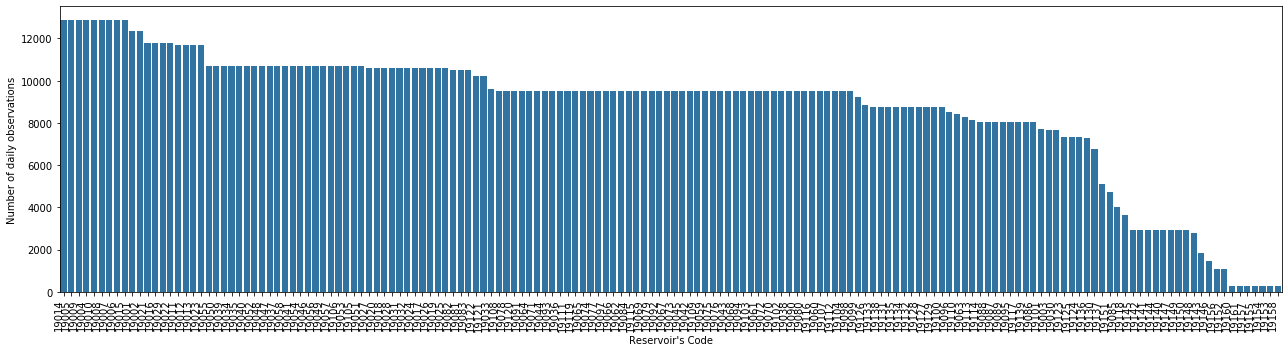

In [378]:
# Create an array with the 'reservoirs_code' values
# Create a Pandas Series with the reservoir_array list
# Define the size of the plot to be able to show the 160 reservoirs on the x label
# Define the color of the plot
# Create the a list with the order of plot within an index basis
# Plot the countplot with the daily measurements' count for each reservoir
# Label the x and y axis

reservoir_array = reservoirs_df['reservoir_code'].values
ds = pd.Series({"Reservoir" : reservoir_array})
plt.figure(figsize=(18,5))
base_color = sb.color_palette()[0]
type_order = reservoirs_df['reservoir_code'].value_counts().index
ax = sns.countplot(x="Reservoir", data=ds, color=base_color, order=type_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set(xlabel='Reservoir\'s Code', ylabel='Number of daily observations')
plt.tight_layout()
plt.show()

We can see here that there are some reservoirs with a lot of missing daily observations on the time series. This will be used further to filter and plot only the reservoirs with tidy time series data (for our variables of interest).

Let's check the number of observations by year to verify what years are represented on the time series.

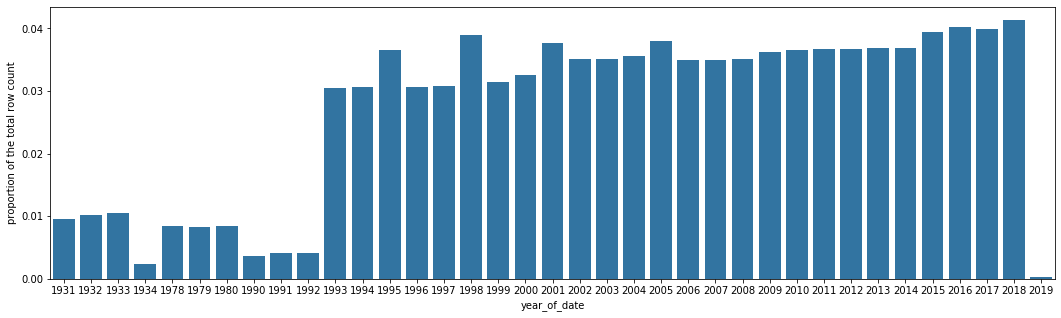

In [379]:
# getting the first color on the palette and using this color stored on a variable inside the seaborn countplot
base_color = sb.color_palette()[0]

# sorting the bars by year_of_date's ascending order
type_order = reservoirs_df['year_of_date'].value_counts().index.sort_values()

# get proportion taken by the max row count per year for derivation of tick marks
n_points = reservoirs_df.shape[0]
max_count = reservoirs_df['year_of_date'].value_counts().max()
max_prop = max_count / n_points

# arange() function will produce a set of evenly spaced proportioned values between zero and the maximum proportion
# value in steps of 1%. Then we store it on the tick_props variable
tick_props = np.arange(0, max_prop, 0.01)

# using a list comprehension to create the tick name for each tick proportion created before 
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# resize the plot
plt.figure(figsize=(18,5))

# setting the plot parameters
sns.countplot(data=reservoirs_df, x='year_of_date', color=base_color, order=type_order);

# since the counts are still an absolute value, we need to multiple 'tick_props' by the total row count('n_points') 
#to get their position correct, then in the second argument we specify the tick names. We need to do that since 
# the values and positions are different
plt.yticks(tick_props * n_points, tick_names)

# changing the y label to a more appropriate label
plt.ylabel('proportion of the total row count');

We can see here that there is no data record between 1934 and 1987, and between 1980 and 1990. It is also clear on the bar plot that there is really low data observations prior to 1993 and in 2019, this analysis will be taken in consideration further in order to filter and plot only the years and reservoirs with tidy time series data (for our variables of interest). 

Let's now look at the Null values quantity inside each variable.

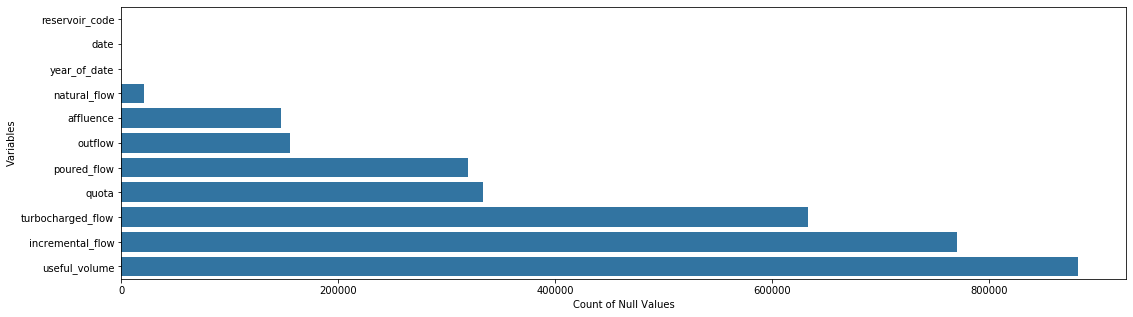

In [333]:
# Count the number of Nulls per variable and store it inside 'na_counts'
# Set color palette and size of the plot
# Set plot parameters and labels

na_counts = reservoirs_df.isna().sum()
type_order = reservoirs_df.isna().sum().sort_values().index
base_color = sb.color_palette()[0]
plt.figure(figsize=(18,5))
null_plot = sns.barplot(y=na_counts.index.values, x=na_counts, color=base_color, order=type_order);
null_plot.set(xlabel='Count of Null Values', ylabel='Variables');

This data set has 1,397,098 rows in total, 2 variables here have more than half of their rows filled with Null values: `incremental_flow` and `useful_volume`. This will be investigated further, as we have on this data, reservoirs designed to different purposes other than energy production.

I start now to see the distribution of the variables of interest: `natural_flow`, `affluence`.

In [380]:
# Checking the statistics for the numerical variables
print(reservoirs_df.describe())

              quota     affluence  turbocharged_flow   poured_flow  \
count  1.063459e+06  1.249750e+06      763582.000000  1.077807e+06   
mean   4.373298e+02  9.079296e+02         763.538524  1.822734e+02   
std    2.222009e+02  2.465153e+03        1619.680689  1.422522e+03   
min    0.000000e+00 -1.747880e+05      -22089.000000 -1.000000e+00   
25%    2.850600e+02  7.200000e+01          76.000000  0.000000e+00   
50%    4.271400e+02  2.494100e+02         273.000000  0.000000e+00   
75%    6.057500e+02  8.420000e+02         813.000000  0.000000e+00   
max    8.607000e+03  1.928960e+05       27160.000000  5.733500e+04   

            outflow  incremental_flow  natural_flow  useful_volume  
count  1.241403e+06     627067.000000  1.375997e+06  515013.000000  
mean   9.078874e+02        336.785691  9.767174e+02      61.025328  
std    2.362226e+03       2127.533407  2.817007e+03      29.508893  
min   -8.600000e+01    -181609.360000 -2.747970e+04    -646.000000  
25%    7.700000e+01     

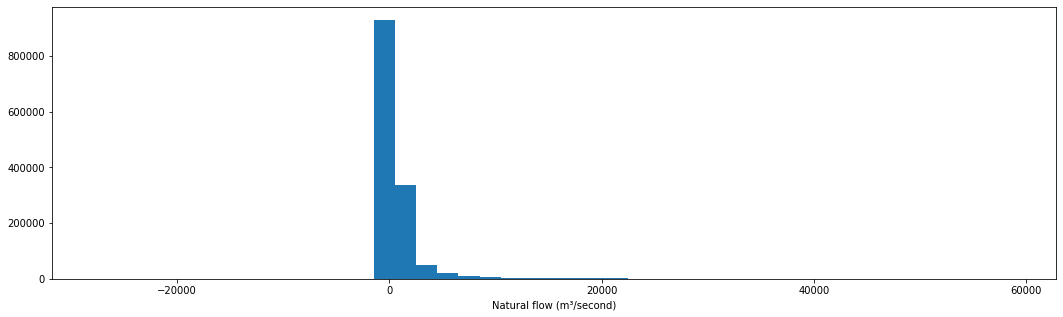

In [404]:
# Create a distribution plot for the natural_flow variable

binsize = 2000
bins = np.arange(reservoirs_df['natural_flow'].min(), reservoirs_df['natural_flow'].max()+binsize, binsize)
plt.figure(figsize=[18, 5])
plt.hist(data=reservoirs_df, x='natural_flow', bins=bins)
plt.xlabel('Natural flow (m³/second)')
plt.show()

The `natural_flow` has a right skewed distribution, with a lot of low and negative water_flow volumes. The negative values are signal of water shortage, which will be analyzed further with the line plots for each station.

Now let's check the distribution of the `affluence` variable.

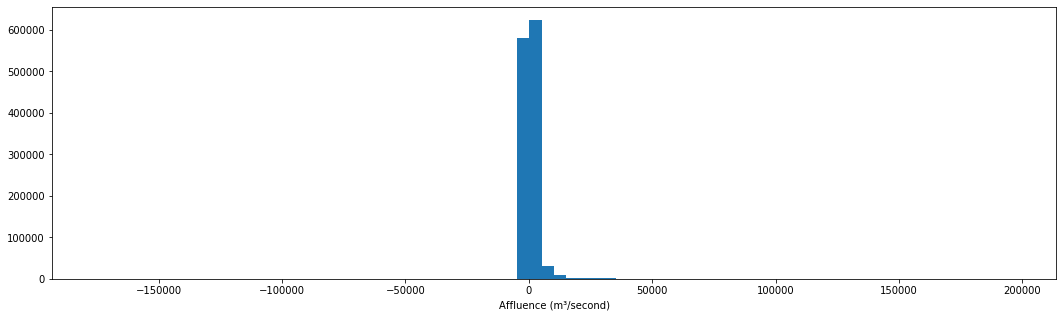

In [408]:
binsize = 5000
bins = np.arange(reservoirs_df['affluence'].min(), reservoirs_df['affluence'].max()+binsize, binsize)
plt.figure(figsize=[18, 5])
plt.hist(data=reservoirs_df, x='affluence', bins=bins)
plt.xlabel('Affluence (m³/second)')
plt.show()

The `affluence`variable shows a similar behavior to the `natural_flow`distribution, as they are theoretically correlated. 

I will now start the Bivariate Exploration, checking the correlation between the variables on the data set, and try to find some other insights about the data.

## Bivariate Exploration

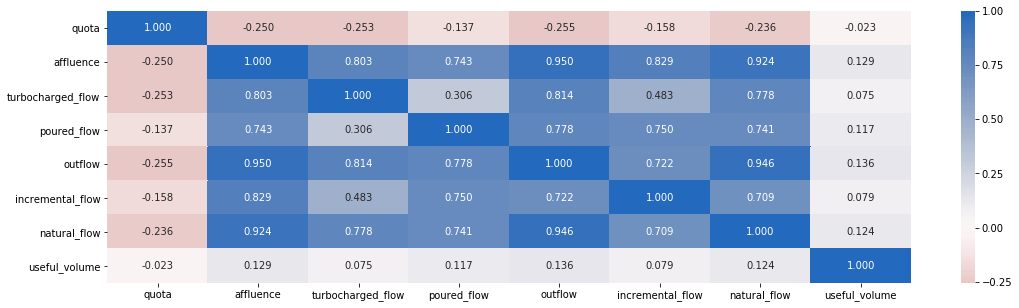

In [411]:
# Creating a heat map correlation plot for the numerical variables
# Set a list with an ordered variables' names, set the size and parameters for the correlation plot
numeric_vars = ['quota', 'affluence', 'turbocharged_flow', 'poured_flow', 'outflow', 'incremental_flow', 'natural_flow',
               'useful_volume']

plt.figure(figsize = [18, 5])
sns.heatmap(reservoirs_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

As expected, there is a high correlation (0.9) between `outflow` and `affluence`, and between `outflow` and `natural_flow`, as the water flow that goes in is very similar to the water flow that goes out from the reservoir. `affluence` and `natural_flow` are also very correlated to `turbocharged_flow`, `poured_flow`, `out_flow` and `natural_flow`. 

Let's see if these same correlations appear when we sample a single reservoir.  

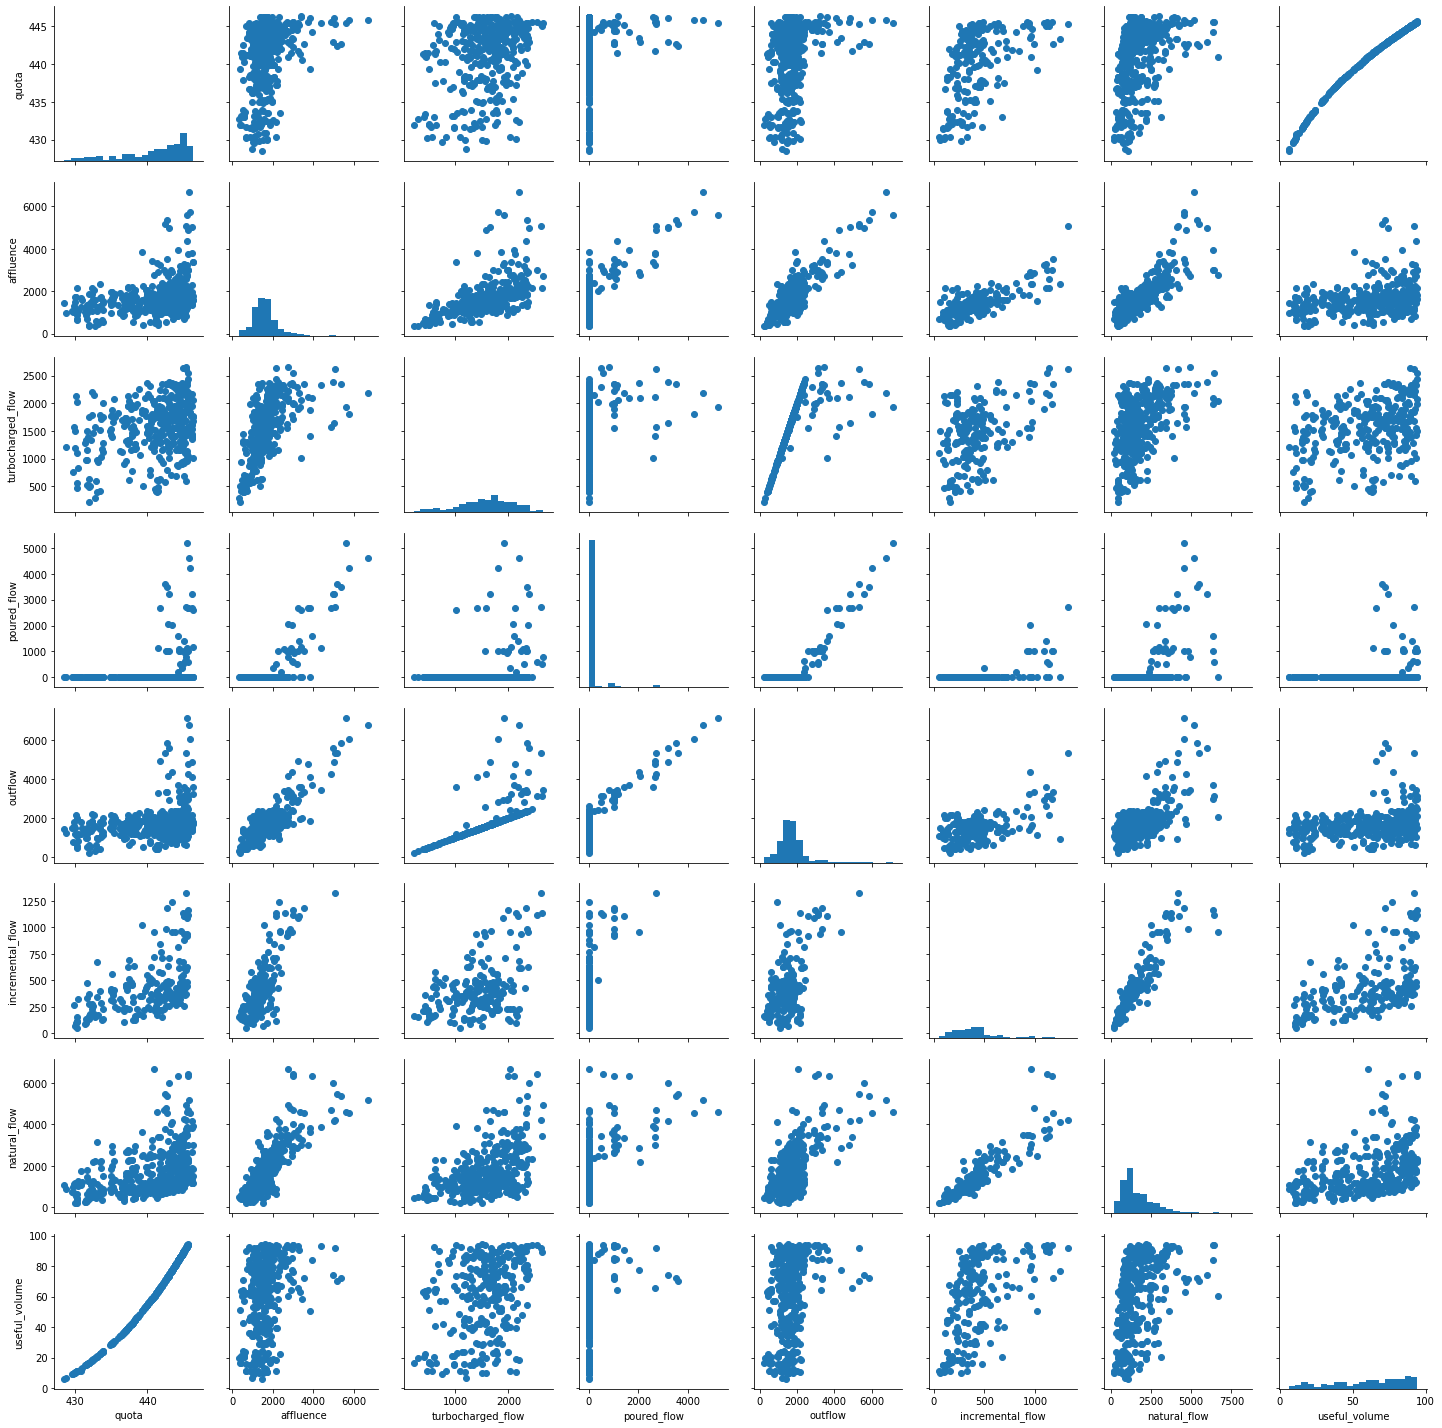

In [421]:
# Create a matrix of scatter plots using a sample of a reservoir with a very large data set, the reservoir_code 19014
# This sampling will make the plot render faster than if we use the whole data set

# Creating a new dataframe (reservoir 19014 observations) and reset the index (in order to sample the data using the index) 
df_19014 = reservoirs_df.query('reservoir_code == "19014"').reset_index(drop=True)

# Make the 500 sample from the dataframe created and index the sampled rows on the 'df_19014' reservoir dataframe
samples = np.random.choice(df_19014.shape[0], 500, replace=False)
reservoir_samp = df_19014.loc[samples,:]

# Set the grids and map the scatter plots inside the grids
g = sb.PairGrid(data=reservoir_samp, vars=numeric_vars);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

The scatter plot shows very similar results but, for this reservoir, it appears that `quota` and `useful_volume` have a very high correlation, which was not shown on the heat map before, probably due to the fact that `useful_volume` has a lot of Null values. 

For this reservoir, it shows that is very likely that the higher the reservoir's altitude (`quota`) is, the higher is its `useful_volume`. 

Let's use a Multivariate Exploration to see other 3 reservoirs' scatter plots to verify the correlation between `useful_volume` and `quota`. I selected another 3 reservoirs with tidy data

## Multivariate Exploration

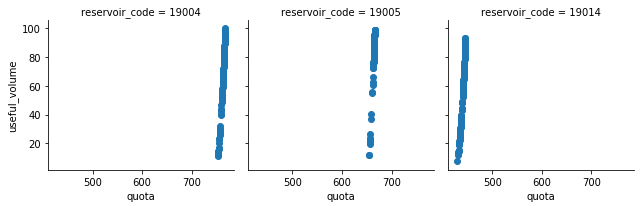

In [445]:
# Create a new dataframe wit for 4 reservoirs (df_4) 
# Create a scatter plot to see the correlation between 'useful_volume' and 'quota' 
reservoir_list = ['19014', '19005', '19004']
df_3 = reservoirs_df[reservoirs_df['reservoir_code'].isin(reservoir_list)].reset_index(drop=True)

# Make the 500 sample from the dataframe created and index the sampled rows on the 'df_4' reservoir dataframe
# This will make the scatter plots render faster 
samples = np.random.choice(df_4.shape[0], 500, replace=False)
df_3_samp = df_3.loc[samples,:]

# Plot the facet grid
g = sb.FacetGrid(data=df_4_samp, col='reservoir_code')
g.map(plt.scatter, 'quota', 'useful_volume');

Those positive correlations confirm that the low correlation between `quota` and `useful_volume` shown previously on the correlation heat map were just a result of the Null values on the total data.

As conclusions of the Exploration phase, we could see:
- a lot of missing years in the time series
- a great number of Null values
- great correlation among òur variable of interest `natural_flow` and the all other variables - `affluence`, `turbocharged_flow`, `poured_flow`, `outflow`, `incremental_flow` and `useful_volume`
- `useful_volume` showed up to be highly correlated to `quota`, `incremental_flow`, and `natural_flow`

On the next part of this project I will filter the reservoirs with tidy time series data in order to create time series visualizations and see the trends in the brazilian water supply.

In [509]:
# Save the dataframe into a csv file for the Part 2 of this project
reservoirs_df.to_csv('reservoirs_time_series.csv', index=False)